In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('e_jet')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/102.root"]
df = getData(files)


Processed $HOME/EIC/output/102.root in 34.2 seconds


In [4]:
d = applyCut(df, '0.1 < y < 0.85', 'y')
d = applyCut(d, 'Q2 > 10', 'Q2')
d = applyCut(d, 'pt_jet > 4', 'pt')

y 6783540  fraction kept: 18.7
Q2 2277556  fraction kept: 33.6
pt 188342  fraction kept: 8.3


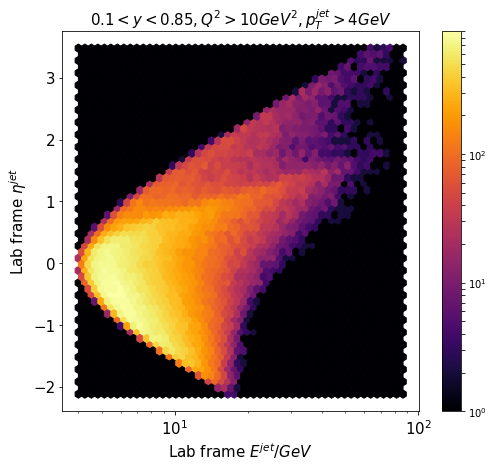

In [6]:
fig = plt.figure(figsize=(8,7))
plot2d(d, 'e_jet', 'eta_jet', 'Lab frame $ E^{jet}/GeV$', 'Lab frame $ \eta^{jet} $', '0.1 < y < 0.85, Q^2 > 10 GeV^2, p_T^{jet} > 4 GeV')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/eta_jet_vs_e_jet.pdf', bbox_inches='tight')

In [16]:
print max(d['eta_jet'])

3.48999977112


In [6]:
files = ["$HOME/EIC/output/111.root"]
df = getData(files)


Processed $HOME/EIC/output/111.root in 30.2 seconds


In [7]:
d = applyCut(df, '0.1 < y < 0.85', 'y')
d = applyCut(d, 'Q2 > 10', 'Q2')
d = applyCut(d, 'pt_jet > 4', 'pt')

y 6463835  fraction kept: 21.5
Q2 2046505  fraction kept: 31.7
pt 162088  fraction kept: 7.9


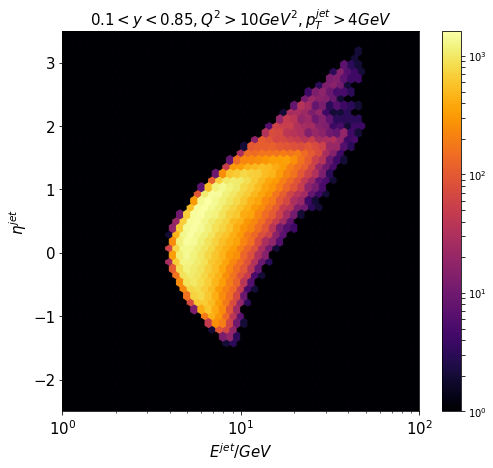

In [8]:
fig = plt.figure(figsize=(8,7))
plot2d(d, 'e_jet', 'eta_jet', '$ E^{jet}/GeV$', '$ \eta^{jet} $', '0.1 < y < 0.85, Q^2 > 10 GeV^2, p_T^{jet} > 4 GeV',\
      lim=((0,2,-2.5,3.5)))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(left=1, right=100)
plt.ylim(bottom=-2.5, top=3.5)
plt.savefig('images/eta_jet_vs_e_jet.pdf', bbox_inches='tight')